<h1>Part 2: Code Quiz<h1>

### <b>Study Case</b>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model to predict if a patient has this disease or not. We will use SVC (SVM for classification) and 
Decision Tree (ID3) algorithms.

### Download the data from here: 
https://drive.google.com/file/d/1NUSiCOcClcrPOH8ClMYK6Dp6p-7evNTv/view?usp=sharing


### <b>ABOUT DATASET: </b>

1. age
2. sex (1= Male, 0= Female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


The "AHD" field refers to the presence of heart disease in the patient, the value is No and Yes.


## Weight 10%

In [27]:
#1 import all libraries required : (e.g: numpy and pandas, sklearn, matplotlib, etc)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score

In [28]:
#2 Import dataset into variabel
df = pd.read_csv("Heart.csv")

In [29]:
#3 shows attributes, number of data and the data types for each attributes 
# AHD is Acquired heart diseases ~ later will be used as "TARGET Class"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [30]:
#4 remove column 'Unnamed: 0'
df = df.drop(df.columns[[0]], axis = 1)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [31]:
#5 print 'Data First 5 Rows Show'
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [32]:
#6 print 'Data Last 5 Rows Show'
df.tail(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [34]:
#7 print the statistic of the dataset (count, mean, SD, min, max, etc )
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [35]:
#8 check null on all data and If data has null, by sum of null data's
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [36]:
#9 Try removing all the rows from the dataset that contain missing values. How many are left?
df = df.dropna()
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [37]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19208\720966294.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(df.corr(), annot=True)


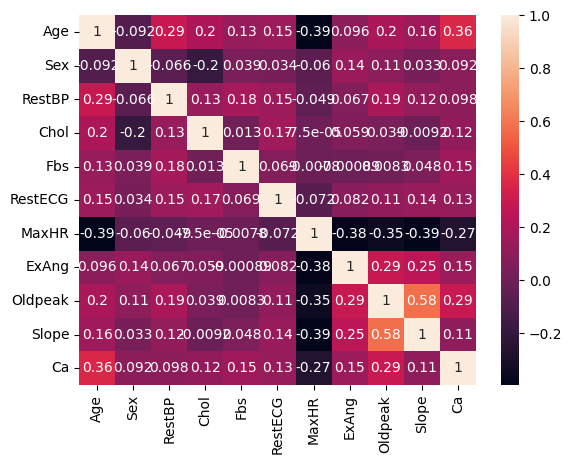

In [39]:
#10 Show statistical correlation value from each column using SNS heatmap
plot = sns.heatmap(df.corr(), annot=True)

##*Lets* do some attribute analysis - Age Analysis (Weight 20%)



In [45]:
#11 Print variance age data from dataset
df['Age'].var()

81.8977158977159

In [53]:
#12 Please divide data into three groups: the elderly (>55yo),middle-aged(40-55yo), young(<40yo) people by looking at the age ranges.
conditions = [df["Age"] > 55, (df["Age"] <= 55) & (df["Age"] >= 40), df["Age"] < 40]
choices = ['Elderly', 'Middle-Aged', 'Young']
df['Age Range'] = np.select(conditions, choices)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19208\855326384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Range'] = np.select(conditions, choices)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age Status,Age Range
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Elderly,Elderly
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Elderly,Elderly
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Elderly,Elderly
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,Young,Young
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Middle-Aged,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes,Elderly,Elderly
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,Middle-Aged,Middle-Aged
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,Elderly,Elderly
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,Elderly,Elderly


<BarContainer object of 297 artists>

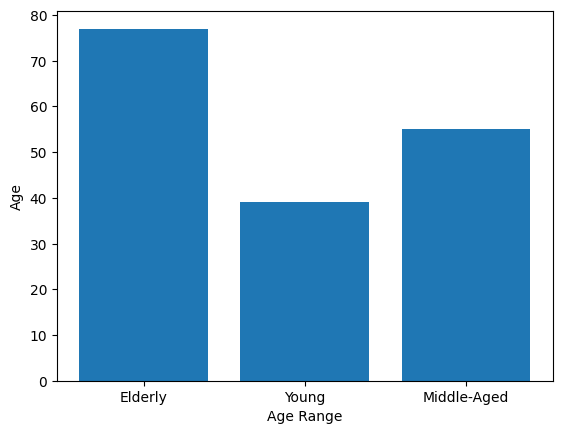

In [66]:
#13 Show the data count for each age based on their groups: elderly, middle-aged, young people and please show it in a Bar Plot

x = df["Age Range"]
y = df["Age"]

plt.xlabel('Age Range')
plt.ylabel('Age')
plt.bar(x,y)

In [68]:
#14 add a new column 'AgeRange' and put the correct value based on the age category. Then plot a categorical scatterplot to show each observation. Your chart will show something like this
# I already added the the column on number 12



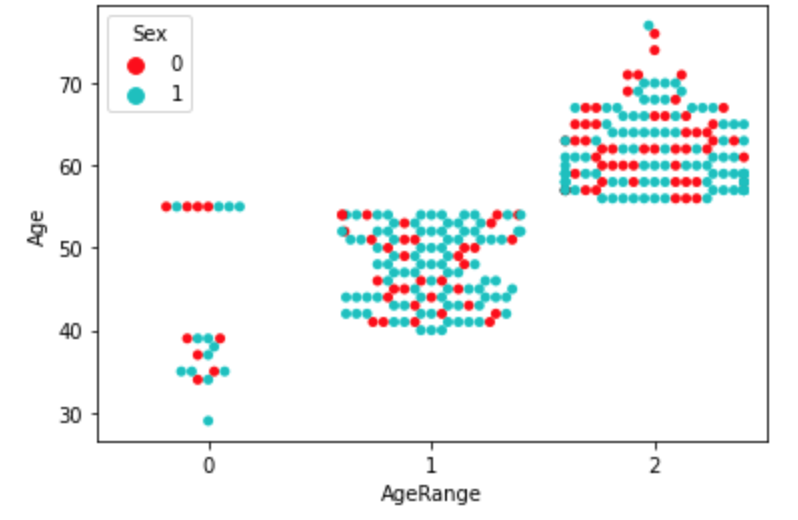

In [71]:
#15 Show 'Age Range' value distributions in Pie Chart


## **MODEL, TRAINING and TESTING (Weight 30%)**

As a result of our initial evaluations, we have used a number of artificial learning algorithms. support vector machine (SVM) and Decision Trees algorithms. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations.

In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.

In [73]:
#16 Some of the data is still in string, so we need to change it to numeric (ChestPain, Thal, and AHD)



In [ ]:
#17 Please show the statistical correlation value (Hint: use function corr) amongst all the columns in the dataset


The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. The minus value is a big problem, but the value of the transactions are more valuable for us.

In [ ]:
#18 Please normalize the data (hint: use StandardScaler)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [ ]:
#19 Split dataset into two subsets: train and test sets (Train: 67%, Test: 33%)


## Optional steps for Extra Point (additional extra point Weight 20%)




This is ***OPTIONAL STEPs*** to improve accuracy of your model

 implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [ ]:
#* investigate the explained variance ratio and resulting principal components


In [ ]:
#* apply PCA to the data with number of components = 8 for X_train


In [ ]:
#* apply PCA to the data with number of components = 8 for X_test


According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.

Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.

Now, you can constitute a DataFrame out of my reduced data with two dimensions:

In [ ]:
#*  create combine feature list for training the model based on reduced data (optional steps that can be used for training SVM and Decision Tree Models)


##Lets create the training Model and test the performance

**SVM**

In [ ]:
# Please import all required library for SVM (Classification)


In [ ]:
# 20 
# Build an SVM model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup random_state to compare the same data with other model later (Decision Tree)


**Decision Tree**

In [ ]:
# Please import all required library for DecisionTreeClassifier 

In [ ]:
# 21 
# Build a Decision Tree model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup same random_state 

**Last thing, What you could conclude with this analysis?**

Please summarize your finding from these model performance